In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

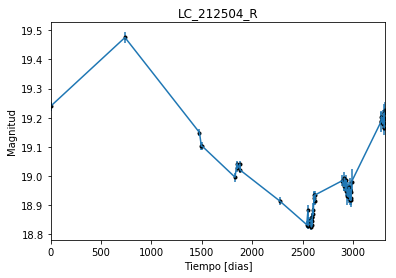

In [2]:
data = np.genfromtxt('LC_212504_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212504_R')
plt.savefig("LC_212504_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

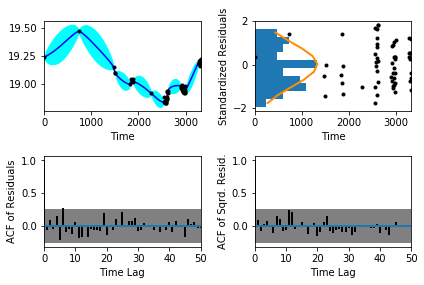

In [5]:
sample.assess_fit()

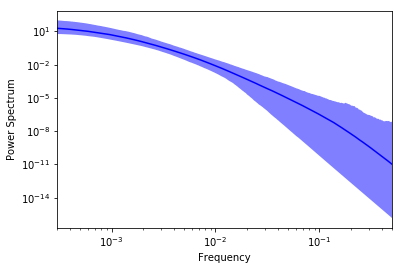

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

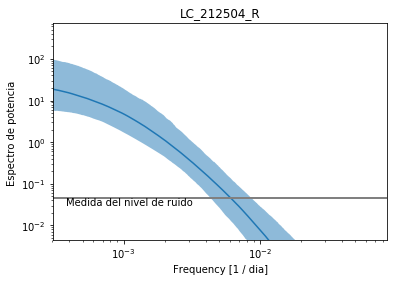

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212504_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212504_R')

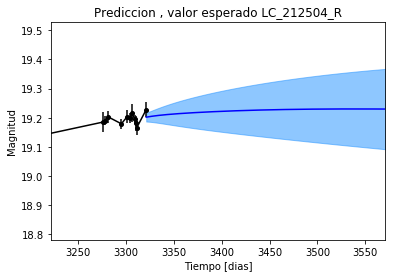

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212504_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_212504_R')

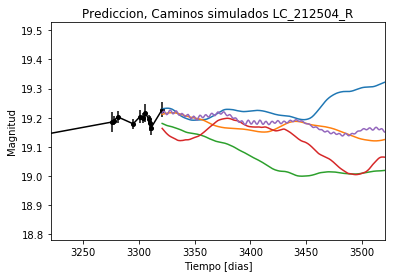

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212504_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


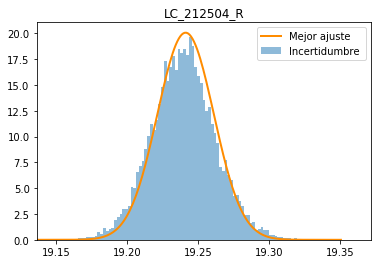

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212504_R')
plt.savefig("Mejor_ajuste_LC_212504_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212504_R')

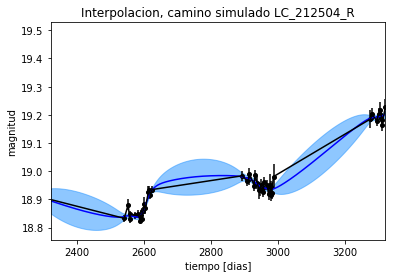

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212504_R')

Text(0.5,1,'Interpolacion, camino simulado  LC_212504_R')

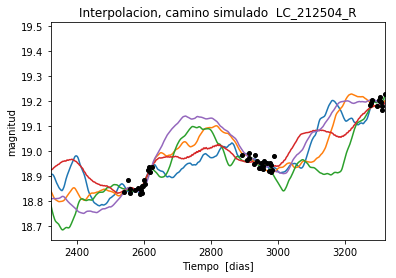

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212504_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 457.766568182
Median: 0.0348258411167
Standard deviation: 0.235276919462
68% credibility interval: [ 0.00247879  0.3599986 ]
95% credibility interval: [  4.36061695e-04   8.55129194e-01]
99% credibility interval: [  3.15948145e-04   9.58945822e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 436.821562687
Median: 0.00299887311003
Standard deviation: 0.0684005601261
68% credibility interval: [ 0.00047432  0.02116462]
95% credibility interval: [ 0.00031923  0.21050029]
99% credibility interval: [  3.04407620e-04   4.83148914e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 584.535853819
Median: 0.0159578810718
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1178.12461947
Median: 150.164233683
Standard deviation: 1.78145343004
68% credibility interval: [ 148.14901769  151.46615155]
95% credibility interval: [ 145.45889032  152.32984189]
99% credibility interval: [ 143.29687278  152.54355073]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 436.320009013
Median: 0.964536601668
Standard deviation: 2.32198547498
68% credibility interval: [ 0.07351412  4.47095845]
95% credibility interval: [ 0.02231167  7.85372684]
99% credibility interval: [  0.01196549  10.01955396]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 738.397895889
Median: 0.824755951046
Standard deviation: 7.68054769478
68% credibility interval: [ 0.05006909  8.05730577]
95% credibility interval: [  3.97637566e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19740.5538736
Median: 3.36593491742e-20
Standard deviation: 1.11561948409e+76
68% credibility interval: [  6.96487645e-46   1.61664594e-03]
95% credibility interval: [  1.19482543e-74   1.46209107e+02]
99% credibility interval: [  1.05774893e-78   2.08978301e+10]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2377.78648547
Median: 19.1438960195
Standard deviation: 0.103425700652
68% credibility interval: [ 19.05225668  19.23504136]
95% credibility interval: [ 18.95146466  19.34933606]
99% credibility interval: [ 18.84981574  19.4665763 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 243.238193519
Median: 0.0
Standard deviation: 0.223611168236
68% credibility interval: [ 0.          0.29187573]
95% credibility interval: [ 0.          0.83773635]
99% credibility interval: [ 0.          0.96401046]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 243.238193519
Median: 0.0
Standard deviation: 0.223611168236
68% credibility interval: [ 0.          0.29187573]
95% credibility interval: [ 0.          0.83773635]
99% credibility interval: [ 0.          0.96401046]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1009.55695507
Median: 0.0
Standard deviation: 0.000267501366521
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1178.12461947
Median: 150.164233683
Standard deviation: 1.78145343004
68% credibility interval: [ 148.14901769  151.46615155]
95% credibility interval: [ 145.45889032  152.32984189]
99% credibility interval: [ 143.29687278  152.54355073]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2190.76827409
Median: 0.0367823988982
Standard deviation: 0.0437704361511
68% credibility interval: [ 0.0227819   0.06746323]
95% credibility interval: [ 0.01525874  0.15587737]
99% credibility interval: [ 0.01224398  0.28576775]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1255.10388
Median: 0.940458587979
Standard deviation: 0.147891401054
68% credibility interval: [ 0.81058193  1.09936074]
95% credibility interval: [ 0.70771748  1.2827518 ]
99% credibility interval: [ 0.65352087  1.4326462 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 967.753328075
Median: 0.000312514614384
Standard deviation: 0.00478540921474
68% credibility interval: [  1.46585793e-05   3.29200315e-03]
95% credibility interval: [  3.96526115e-07   1.51439269e-02]
99% credibility interval: [  1.25854421e-15   2.90688673e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 457.766568182
Median: (-0.218817213214+0j)
Standard deviation: 2.03944474884
68% credibility interval: [-2.26193791+0.j         -0.01557472-0.73796841j]
95% credibility interval: [ -5.37293518e+00+0.j          -2.73985644e-03-0.06656191j]
99% credibility interval: [ -6.02523430e+00+0.j          -1.98516074e-03-1.65355067j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 436.821562687
Median: (-0.018842475463+0.0343486879303j)
Standard deviation: 1.46925260377
68% credibility interval: [-0.13298126+0.07103673j -0.00298027+0.21497344j]
95% credibility interval: [-1.32261235+4.73131523j -0.00200578+0.j        ]
99% credibility interval: [ -3.03571416e+00+1.21412282j  -1.91264949e-03+0.j        ]
Posterior summary for para